# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import scipy.io
import seaborn as sns


np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
import scipy.io
import pandas as pd

mat_data = scipy.io.loadmat('data/ejer_1_data1.mat')

mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [12]:
X2 = mat_data['X']
y2 = mat_data['y']

#### 3. Create a DataFrame with the features and target

In [13]:
df= pd.DataFrame(X2, columns=['x1','x2'])
df['target'] = y2

df.head()

,x1,x2,target
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   target  51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [14]:
df.describe()

,x1,x2,target
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


#### 4. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

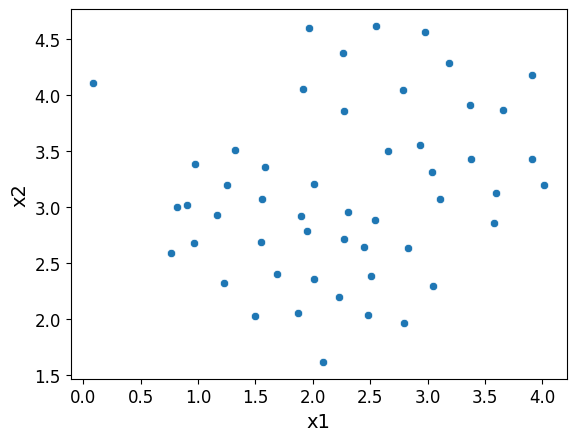

In [20]:
import matplotlib.pyplot as plt
sns.scatterplot(x='x1', y='x2', data=df)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = df[['x1','x2']]
y=df['target']


Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Declarar LinearSVC con los hiperparámetros especificados
svm_model = LinearSVC(
    C=1,               # Parámetro de regularización
    loss='hinge',        # Función de pérdida (estándar para SVM)
    max_iter=10000,      # Máximo número de iteraciones
    random_state=42      # Para reproducibilidad
)

# 2. Entrenar el modelo
svm_model.fit(X,y)

# 3. Evaluar
y_pred = svm_model.predict(X)


#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [23]:
svm_model.score(X,y)


0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [24]:
c= [10,50,500,1000,2000]
for cs in c:
    svm_model_c = LinearSVC(
    C=cs,               # Parámetro de regularización
    loss='hinge',        # Función de pérdida (estándar para SVM)
    max_iter=10000,      # Máximo número de iteraciones
    random_state=42      # Para reproducibilidad
)
    svm_model.fit(X,y)
    print(svm_model.score(X,y))

0.9803921568627451
0.9803921568627451
0.9803921568627451
0.9803921568627451
0.9803921568627451


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [25]:
decision_values = svm_model.decision_function(X)

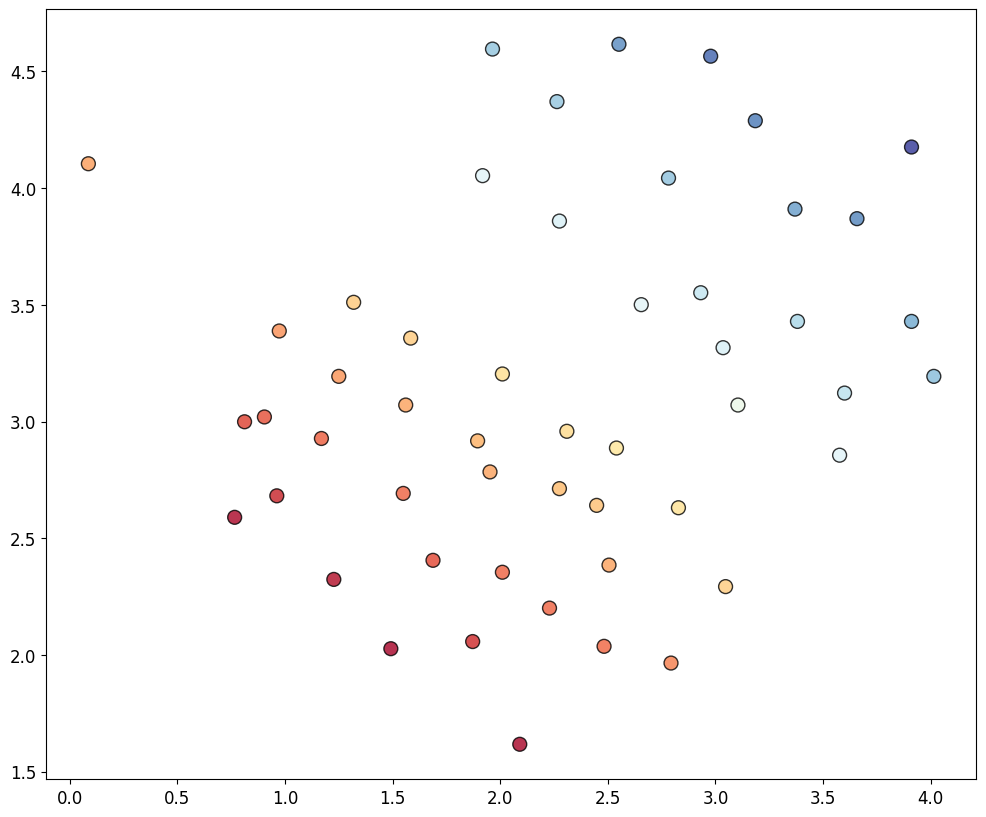

In [ ]:
plt.figure(figsize=(12, 10))

# Scatter plot con colores según la función de decisión
scatter = plt.scatter(df['x1'],df['x2'],
                      c=decision_values, 
                      cmap='RdYlBu', 
                      s=100, 
                      edgecolors='black',
                      alpha=0.8,
                      linewidth=1)

## 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

#### 1. Load the data `ejer_1_data2.mat`

In [27]:
mat_data = scipy.io.loadmat('data/ejer_1_data2.mat')

mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [29]:
X2 = mat_data['X']
y2 = mat_data['y']

df= pd.DataFrame(X2, columns=['x1','x2'])
df['target'] = y2

df.head()

,x1,x2,target
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

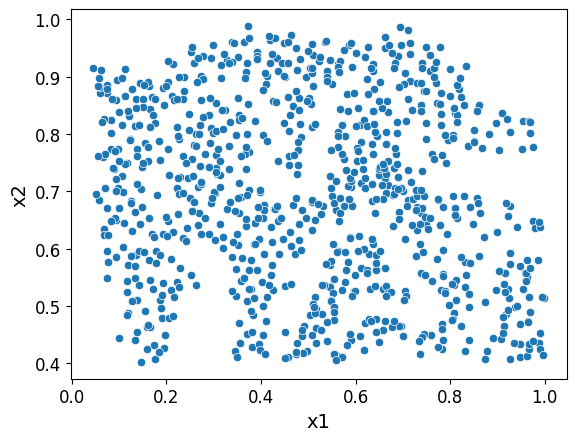

In [30]:
import matplotlib.pyplot as plt
sns.scatterplot(x='x1', y='x2', data=df)

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [34]:

X = df[['x1','x2']]
y=df['target']

# 1. Declarar LinearSVC con los hiperparámetros especificados
from sklearn.svm import SVC

# Declare SVC with specified hyperparameters
svc = SVC(C=100, gamma=10, probability=True, random_state=42)

# # 2. Entrenar el modelo
# svm_model.fit(X,y)

# # 3. Evaluar
# y_pred = svm_model.predict(X)

#### 5. Fit the classifier and get the score

In [35]:
svc.fit(X,y)

,C,100
,kernel,'rbf'
,degree,3
,gamma,10
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [36]:
svc.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

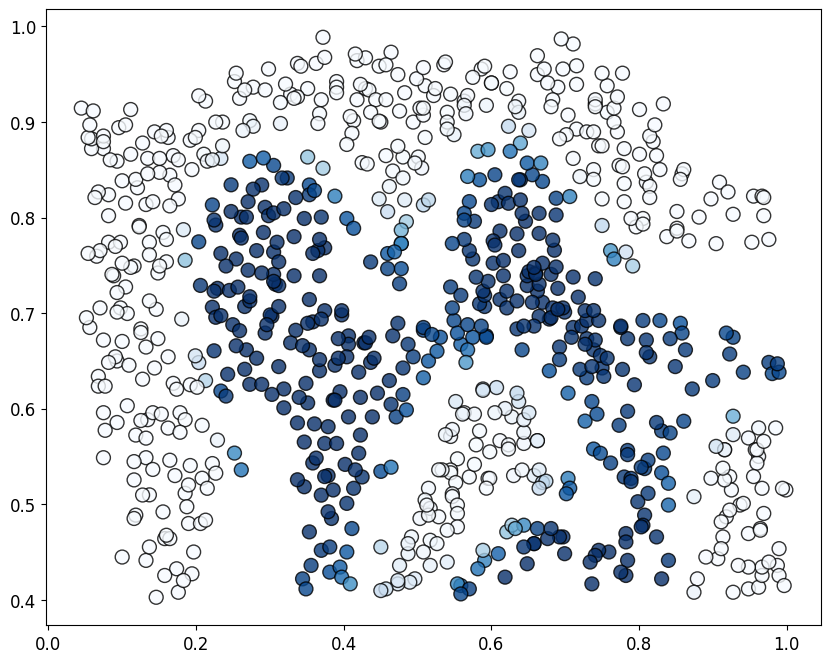

In [37]:
plt.figure(figsize=(10, 8))

# Plot with color based on probability of class 0
scatter = plt.scatter(df['x1'], df['x2'], c=svc.predict_proba(X)[:, 0], 
                      cmap='Blues', edgecolor='k', s=100, alpha=0.8)
